<a href="https://colab.research.google.com/github/ppalit/SpringBatchExample/blob/master/Dog_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs vs Cats**


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
import logging

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

**Loading Data...**

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [7]:
zip_dir_base = os.path.dirname(zip_dir)
zip_dir_base

'/root/.keras/datasets'

In [0]:
base_dir = os.path.join(zip_dir_base,'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats = os.path.join(train_dir,'cats')
train_dogs = os.path.join(train_dir,'dogs')
validate_cats = os.path.join(validation_dir,'cats')
validate_dogs = os.path.join(validation_dir,'dogs')


In [9]:
num_cats_train = len(os.listdir(train_cats))
num_dogs_train = len(os.listdir(train_dogs))
num_cats_valid = len(os.listdir(validate_cats))
num_dogs_valid = len(os.listdir(validate_dogs))

total_train = num_cats_train + num_dogs_train
total_valid = num_cats_valid + num_dogs_valid

print("number of training cats: ",num_cats_train)
print("number of training dogs: ",num_dogs_train)
print("number of validating cats: ",num_cats_valid)
print("number of validating dogs: ",num_cats_valid)


number of training cats:  1000
number of training dogs:  1000
number of validating cats:  500
number of validating dogs:  500


In [0]:
BATCH_SIZE = 100
IMG_SHAPE  = 150
 

**Prepocessing Data...**

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


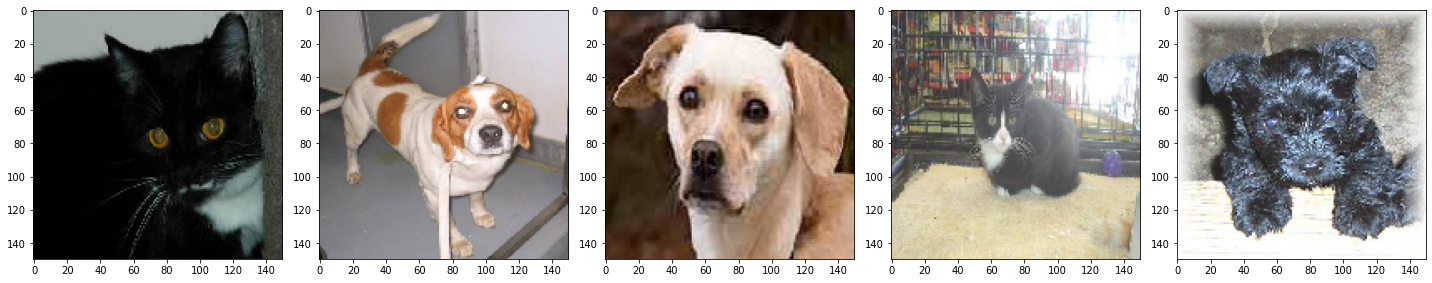

In [13]:
sample_training_images, _ = next(train_data_gen) 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5]) 

**Model...**

In [0]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                tf.keras.layers.MaxPool2D(2,2),

                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),

                tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                
                tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),

                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512,activation='relu'),
                tf.keras.layers.Dense(2)
])


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
EPOCS= 100
history =  model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs=EPOCS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_valid/ float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 10s 507ms/step - loss: 0.7377 - accuracy: 0.5155 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 10s 506ms/step - loss: 0.6914 - accuracy: 0.5240 - val_loss: 0.6848 - val_accuracy: 0.5010
Epoch 3/100
20/20 [==============================] - 10s 504ms/step - loss: 0.6754 - accuracy: 0.5760 - val_loss: 0.6865 - val_accuracy: 0.5430
Epoch 4/100
20/20 [==============================] - 10s 501ms/step - loss: 0.6468 - accuracy: 0.6315 - val_loss: 0.6195 - val_accuracy: 0.6620
Epoch 5/100
20/20 [==============================] - 10s 503ms/step - loss: 0.6318 - accuracy: 0.6400 - val_loss: 0.6093 - val_accuracy: 0.6880
Epoch 6/100
20/20 [==============================] - 10s 500ms/step - loss: 0.5816 - accuracy: 0.6945 - val_loss: 0.6327 - val_accuracy: 0.6510
Epoch 7/100
20/20 [==============================] - 10s 511ms/step - loss: 0.5452 - accuracy: 0.7140 - val_loss: 0.5777 - val_accuracy:

In [18]:
history

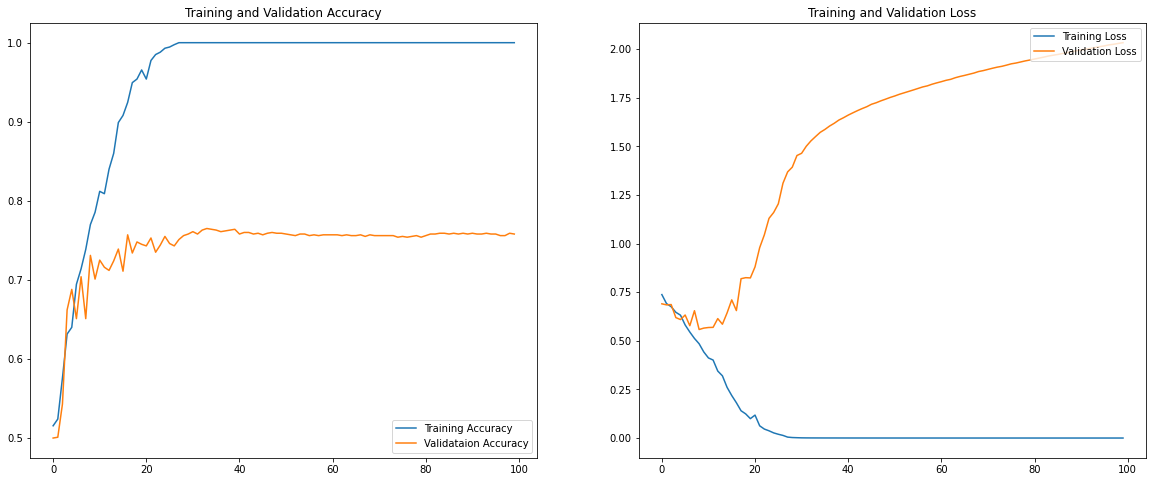

In [27]:
acc = history.history['accuracy']
val_acc  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(EPOCS)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label='Training Accuracy')
plt.plot(epoch_range,val_acc,label='Validataion Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')

plt.show()